In [1]:
import pandas as pd
import numpy as np
import torch

In [2]:
readme_text = np.array(open(f'./ml-1m/README').read().splitlines())
start_index = np.flatnonzero(np.core.defchararray.find(readme_text,'Occupation is chosen')!=-1)[0]
end_index = np.flatnonzero(np.core.defchararray.find(readme_text,'MOVIES FILE DESCRIPTION')!=-1)[0]
occupation_list = [x.split('"')[1] for x in readme_text[start_index:end_index][2:-1].tolist()]
occupation_dict = dict(zip(range(len(occupation_list)), occupation_list))

users_df = pd.read_csv(f'./ml-1m/users.dat',
                       delimiter='::', engine='python', header=None,
                       names=['user_id', 'gender', 'age', 'occupation', 'zip_code'])
users_df['occupation'] = users_df['occupation'].replace(occupation_dict)
users_df.head()

,user_id,gender,age,occupation,zip_code
0,1,F,1,K-12 student,48067
1,2,M,56,self-employed,70072
2,3,M,25,scientist,55117
3,4,M,45,executive/managerial,02460
4,5,M,25,writer,55455


In [3]:
encode_attribute = pd.get_dummies(users_df[['gender', 'age','occupation']].astype(str))
# encode_attribute = pd.get_dummies(users_df[['gender']].astype(str))

In [4]:
# encode_age = pd.get_dummies(users_df[['age']].astype(str))
# encode_age

In [5]:
type(encode_attribute)
encode_attribute

,gender_F,gender_M,age_1,age_18,age_25,age_35,age_45,age_50,age_56,occupation_K-12 student,...,occupation_other,occupation_programmer,occupation_retired,occupation_sales/marketing,occupation_scientist,occupation_self-employed,occupation_technician/engineer,occupation_tradesman/craftsman,occupation_unemployed,occupation_writer
0,1,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
2,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6035,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
6036,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6037,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
6038,1,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [6]:
user_boolean_embedding = encode_attribute.to_numpy()[:,:]
user_boolean_embedding.shape

(6040, 30)

In [7]:
user_embedding = torch.load('./KG_embedding/300_epochs_DistMult_gpu34.pt', map_location ='cpu')
# user_embedding = user_embedding.numpy()

In [8]:
user_embedding.shape

torch.Size([6040, 50])

# Weights Interpretation

In [10]:
user_attribute_columns = [col for col in encode_attribute.columns if col != 'UserID']
user_attribute_names = user_attribute_columns
user_attribute_names

['gender_F',
 'gender_M',
 'age_1',
 'age_18',
 'age_25',
 'age_35',
 'age_45',
 'age_50',
 'age_56',
 'occupation_K-12 student',
 'occupation_academic/educator',
 'occupation_artist',
 'occupation_clerical/admin',
 'occupation_college/grad student',
 'occupation_customer service',
 'occupation_doctor/health care',
 'occupation_executive/managerial',
 'occupation_farmer',
 'occupation_homemaker',
 'occupation_lawyer',
 'occupation_other',
 'occupation_programmer',
 'occupation_retired',
 'occupation_sales/marketing',
 'occupation_scientist',
 'occupation_self-employed',
 'occupation_technician/engineer',
 'occupation_tradesman/craftsman',
 'occupation_unemployed',
 'occupation_writer']

In [11]:
# Gender and Age remain unchanged
attribute_labels = [
    "gender_F",       # Female
    "gender_M",       # Male
    "age_1",          # Age 1
    "age_18",         # Age 18
    "age_25",         # Age 25
    "age_35",         # Age 35
    "age_45",         # Age 45
    "age_50",         # Age 50
    "age_56"          # Age 56
]

# Occupation abbreviations
occupation_mapping = {
    "K-12 student": "K-12 std",
    "academic/educator": "educator",
    "artist": "artist",
    "clerical/admin": "clerical",
    "college/grad student": "col/grad std",
    "customer service": "cust service",
    "doctor/health care": "doctor",
    "executive/managerial": "exec/mgr",
    "farmer": "farmer",
    "homemaker": "homemaker",
    "lawyer": "lawyer",
    "other": "other",
    "programmer": "programmer",
    "retired": "retired",
    "sales/marketing": "sales/mkt",
    "scientist": "scientist",
    "self-employed": "self-emp",
    "technician/engineer": "tech/eng",
    "tradesman/craftsman": "trades",
    "unemployed": "unemployed",
    "writer": "writer"
}

# Adding abbreviated occupation labels to the main list
abbreviated_occupations = [
    value for key, value in occupation_mapping.items()
]

# Combine gender, age, and occupations
user_attribute_names = attribute_labels + abbreviated_occupations

user_attribute_names


['gender_F',
 'gender_M',
 'age_1',
 'age_18',
 'age_25',
 'age_35',
 'age_45',
 'age_50',
 'age_56',
 'K-12 std',
 'educator',
 'artist',
 'clerical',
 'col/grad std',
 'cust service',
 'doctor',
 'exec/mgr',
 'farmer',
 'homemaker',
 'lawyer',
 'other',
 'programmer',
 'retired',
 'sales/mkt',
 'scientist',
 'self-emp',
 'tech/eng',
 'trades',
 'unemployed',
 'writer']

In [12]:
user_embedding_names = [i+1 for i in range(50)]

In [24]:
import matplotlib.pyplot as plt
from sklearn.cross_decomposition import CCA
import numpy as np

# Assuming user_matrix and movie_matrix are already defined and preprocessed if necessary

# Initialize CCA with the number of components to compute
n_components = 10  # You want to look at the first component
num_comps_to_save = 10
cca = CCA(n_components)

# Fit CCA on the two datasets
cca.fit(user_boolean_embedding, user_embedding)  # Excluding the ID columns

# Retrieve the canonical coefficients for the second component
# user_attr_weights, user_emb_weights = cca.x_weights_[:, 1], cca.y_weights_[:, 1]
user_attr_weights_multi_comp = cca.x_weights_[:, :num_comps_to_save]
user_emb_weights_multi_comp = cca.y_weights_[:, :num_comps_to_save]


In [30]:
import pickle
data_to_pickle = {
    'user_attr_weights': user_attr_weights_multi_comp,
    'user_emb_weights': user_emb_weights_multi_comp,
    'num_components_saved': num_comps_to_save
}

pickle_filename_combined = 'cca_weights_multi_comp.pkl'
with open(pickle_filename_combined, 'wb') as f: # 'wb' for Write Binary mode
    pickle.dump(data_to_pickle, f)

print(f"\nSaved combined CCA weights to {pickle_filename_combined}")


Saved combined CCA weights to cca_weights_multi_comp.pkl


In [32]:
with open(pickle_filename_combined, 'rb') as f: # 'rb' for Read Binary mode
    loaded_data = pickle.load(f)
loaded_attr_weights = loaded_data['user_attr_weights']
loaded_emb_weights = loaded_data['user_emb_weights']§§§§§§§§§§§
loaded_num_components = loaded_data['num_components_saved']
print(f"\nLoaded user_attr_weights (shape: {loaded_attr_weights.shape}) from pickle.")
print(f"Loaded user_emb_weights (shape: {loaded_emb_weights.shape}) from pickle.")
print(f"Loaded num_components_saved: {loaded_num_components} from pickle.")



Loaded user_attr_weights (shape: (30, 10)) from pickle.
Loaded user_emb_weights (shape: (50, 10)) from pickle.
Loaded num_components_saved: 10 from pickle.


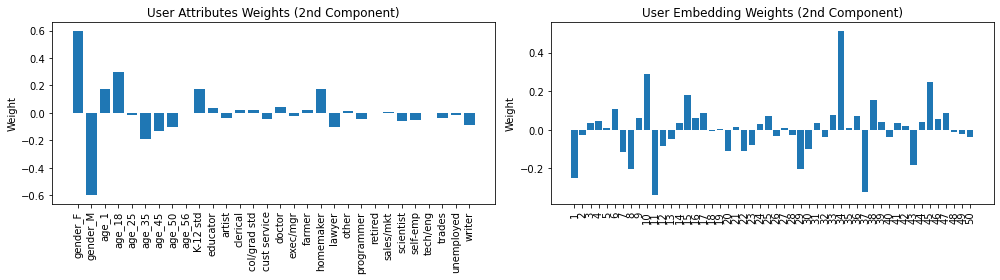

In [25]:
# Function to create a bar plot with labels
def plot_with_labels(weights, labels, title, ax):
    ax.bar(np.arange(len(weights)), weights)
    ax.set_title(title)
    ax.set_xticks(np.arange(len(weights)))
    ax.set_xticklabels(labels, rotation=90)
    ax.set_ylabel('Weight')

# Plotting the weight vectors with labels
plt.figure(figsize=(14, 4))

# User weights plot
plt.subplot(1, 2, 1)
plot_with_labels(user_attr_weights, user_attribute_names, 'User Attributes Weights (2nd Component)', plt.gca())

# Movie weights plot
plt.subplot(1, 2, 2)
plot_with_labels(user_emb_weights, user_embedding_names, 'User Embedding Weights (2nd Component)', plt.gca())

plt.tight_layout()
plt.savefig('./user_weight_result/second_component.png', dpi=300, format='png', bbox_inches='tight')
plt.show()

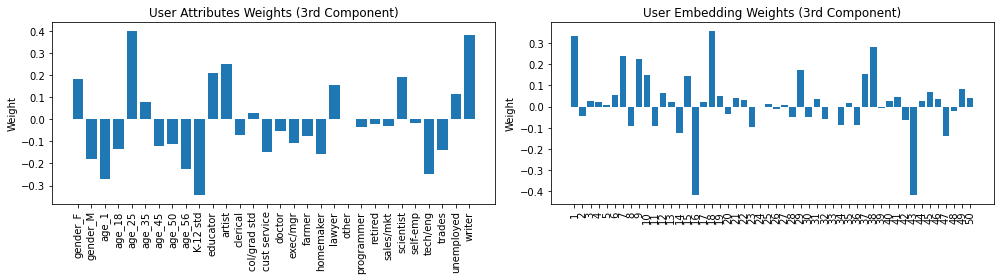

In [30]:
import matplotlib.pyplot as plt
from sklearn.cross_decomposition import CCA
import numpy as np

# Assuming user_matrix and movie_matrix are already defined and preprocessed if necessary

# Initialize CCA with the number of components to compute
n_components = 4  # You want to look at the first component
cca = CCA(n_components)

# Fit CCA on the two datasets
cca.fit(user_boolean_embedding, user_embedding)  # Excluding the ID columns

# Retrieve the canonical coefficients for the second component
user_attr_weights, user_emb_weights = cca.x_weights_[:, 2], cca.y_weights_[:, 2]
# Function to create a bar plot with labels
def plot_with_labels(weights, labels, title, ax):
    ax.bar(np.arange(len(weights)), weights)
    ax.set_title(title)
    ax.set_xticks(np.arange(len(weights)))
    ax.set_xticklabels(labels, rotation=90)
    ax.set_ylabel('Weight')

# Plotting the weight vectors with labels
plt.figure(figsize=(14, 4))

# User weights plot
plt.subplot(1, 2, 1)
plot_with_labels(user_attr_weights, user_attribute_names, 'User Attributes Weights (3rd Component)', plt.gca())

# Movie weights plot
plt.subplot(1, 2, 2)
plot_with_labels(user_emb_weights, user_embedding_names, 'User Embedding Weights (3rd Component)', plt.gca())

plt.tight_layout()
plt.savefig('./user_weight_result/third_component.png', dpi=300, format='png', bbox_inches='tight')
plt.show()

# Rank

In [14]:
np.random.seed(92)  # You can choose any number for the seed

# Number of users to sample
num_samples = 50

sample_indices = np.random.choice(user_embedding.shape[0], num_samples, replace=False)

# Extract the corresponding rows to get the sample
sampled_users = user_embedding[sample_indices, :]

In [15]:
import warnings
warnings.filterwarnings('ignore')

In [16]:
from sklearn.utils import shuffle
user_embedding_shuffled = shuffle(user_embedding)

In [17]:
from matplotlib import pyplot as plt
from sklearn.cross_decomposition import CCA
from sklearn.utils import shuffle


X = user_boolean_embedding
Y = user_embedding

n_comps = min(X.shape[1], Y.shape[1])
cca = CCA(n_components=n_comps)
cca.fit(X, Y)
X_c1, Y_c1 = cca.transform(X, Y)
# print(X_c1[:, 0].shape)
print(np.corrcoef(X_c1[:, 1], Y_c1[:, 1]))
corrs1 = [np.corrcoef(X_c1[:, i], Y_c1[:, i])[0, 1] for i in range(n_comps)] 
# print(corrs1)

[[1.         0.43340398]
 [0.43340398 1.        ]]


In [18]:
print(np.corrcoef(X_c1[:, 0],Y_c1[:, 0]))

[[1.         0.59742061]
 [0.59742061 1.        ]]


In [19]:
X_c1[:,].shape

(6040, 30)

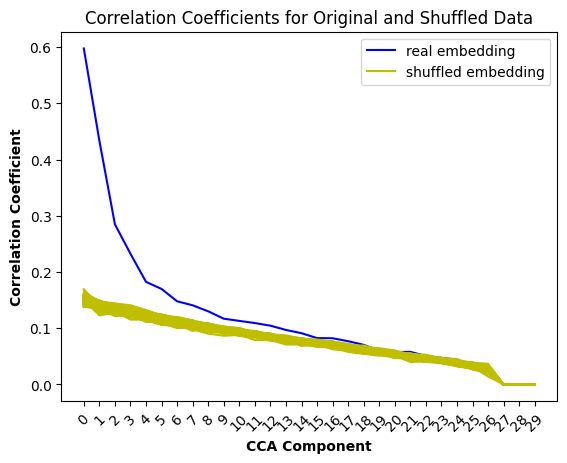

In [20]:
from matplotlib import pyplot as plt
from sklearn.cross_decomposition import CCA
from sklearn.utils import shuffle

    
def plot_cca(X, Y):
    # num of components
#     n_comps = min(X.shape[1], Y.shape[1])
    n_comps = min(X.shape[1], Y.shape[1])
    cca = CCA(n_components=n_comps)
    cca.fit(X, Y)
    X_c1, Y_c1 = cca.transform(X, Y)
    corrs1 = [np.corrcoef(X_c1[:, i], Y_c1[:, i])[0, 1] for i in range(n_comps)] 
    plt.plot(corrs1,'-b',label='real embedding')
    i=0
    while i < 100:
        Y_shuffled = shuffle(Y)
        cca1 = CCA(n_components=n_comps)
        cca1.fit(X, Y_shuffled)
        X_c2, Y_c2 = cca1.transform(X, Y_shuffled)  
        corrs2 = [np.corrcoef(X_c2[:, i], Y_c2[:, i])[0, 1] for i in range(n_comps)]
        i +=1
        plt.plot(corrs2, '-y')
        
    plt.xticks(np.arange(n_comps))
    plt.plot(corrs2, '-y',label='shuffled embedding')
    plt.xticks(np.arange(n_comps), rotation=45)
    plt.xlabel('CCA Component', fontweight='bold')
    plt.ylabel('Correlation Coefficient', fontweight='bold')
    plt.title('Correlation Coefficients for Original and Shuffled Data')
    plt.legend(loc="upper right")
    plt.savefig('permuted_KG_CCA_Distmult.png')
    plt.show()
    
plot_cca(user_boolean_embedding, user_embedding)

# Different Training Stages

In [22]:
epochs300_embedding = torch.load('../../PycharmProjects/MovieLens/embedding/300epochs.pt', map_location ='cpu')
epochs5_embedding = torch.load('../../PycharmProjects/MovieLens/embedding/5epochs.pt', map_location ='cpu')

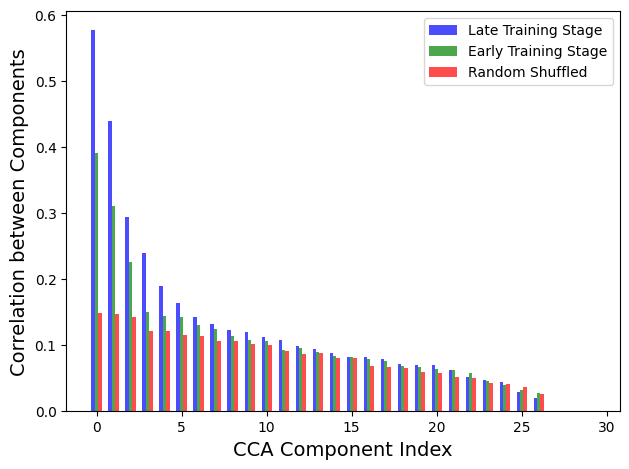

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cross_decomposition import CCA
from sklearn.utils import shuffle

def plot_cca(user_boolean_embedding, group1_embedding, group2_embedding):
    # Number of components is the minimum number of features across all embeddings
    n_comps = min(user_boolean_embedding.shape[1], group1_embedding.shape[1], group2_embedding.shape[1])
    
    # Setup and perform CCA for Group 1
    cca1 = CCA(n_components=n_comps)
    cca1.fit(user_boolean_embedding, group1_embedding)
    X_c1, Y_c1 = cca1.transform(user_boolean_embedding, group1_embedding)
    corrs1 = [np.corrcoef(X_c1[:, i], Y_c1[:, i])[0, 1] for i in range(n_comps)]
    
    # Setup and perform CCA for Group 2
    cca2 = CCA(n_components=n_comps)
    cca2.fit(user_boolean_embedding, group2_embedding)
    X_c2, Y_c2 = cca2.transform(user_boolean_embedding, group2_embedding)
    corrs2 = [np.corrcoef(X_c2[:, i], Y_c2[:, i])[0, 1] for i in range(n_comps)]

    # Randomly shuffle user_boolean_embedding and perform CCA with one of the groups (e.g., Group 1)
    shuffled_embedding = shuffle(user_boolean_embedding, random_state=42)
    cca_random = CCA(n_components=n_comps)
    cca_random.fit(shuffled_embedding, group1_embedding)
    X_cr, Y_cr = cca_random.transform(shuffled_embedding, group1_embedding)
    corrs_random = [np.corrcoef(X_cr[:, i], Y_cr[:, i])[0, 1] for i in range(n_comps)]
    
    # Create a bar plot for the correlations
    fig, ax = plt.subplots()
    ax.bar(np.arange(n_comps) - 0.2, corrs1, width=0.2, color='blue', alpha=0.7, label='Late Training Stage')
    ax.bar(np.arange(n_comps), corrs2, width=0.2, color='green', alpha=0.7, label='Early Training Stage')
    ax.bar(np.arange(n_comps) + 0.2, corrs_random, width=0.2, color='red', alpha=0.7, label='Random Shuffled')

    # Set x-axis and y-axis labels
    plt.xlabel('CCA Component Index', fontsize=14)
    plt.ylabel('Correlation between Components', fontsize=14)
    
    # Add legend
    plt.legend(loc='upper right')
    
    # Adjust spacing and layout
    plt.tight_layout()
    
    # Display the plot
    plt.show()

# Example usage:
plot_cca(user_boolean_embedding, epochs300_embedding, epochs5_embedding)


KeyboardInterrupt: 

Error in callback <function _draw_all_if_interactive at 0x7fdd5a8984c0> (for post_execute):


KeyboardInterrupt: 

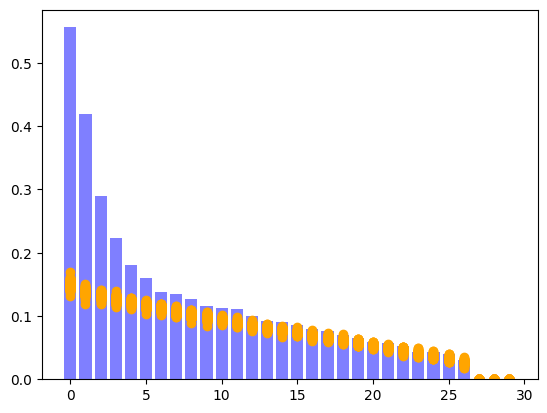

In [56]:
import matplotlib.pyplot as plt
from sklearn.cross_decomposition import CCA
from sklearn.utils import shuffle

def plot_cca(X, Y):
    # Number of components
    n_comps = min(X.shape[1], Y.shape[1])
    
    # Perform CCA
    cca = CCA(n_components=n_comps)
    cca.fit(X, Y)
    X_c1, Y_c1 = cca.transform(X, Y)
    corrs1 = [np.corrcoef(X_c1[:, i], Y_c1[:, i])[0, 1] for i in range(n_comps)]
    
    # Plot the real embedding as a bar plot
    plt.bar(range(n_comps), corrs1, color='blue', alpha=0.5, label='Real Pair')
    
    i = 0
    while i < 100:
        user_embedding_shuffled = shuffle(user_embedding)
        cca1 = CCA(n_components=n_comps)
        cca1.fit(X, user_embedding_shuffled)
        X_c2, Y_c2 = cca1.transform(X, user_embedding_shuffled)
        corrs2 = [np.corrcoef(X_c2[:, i], Y_c2[:, i])[0, 1] for i in range(n_comps)]
        i += 1
        plt.scatter(range(n_comps), corrs2, color='orange')
    
    # Plot the shuffled embedding as a scatter plot
    plt.scatter(range(n_comps), corrs2, color='orange', label='Permuted Pairs')
    
    # Set x-axis and y-axis labels
    plt.xlabel('CCA Index', fontsize=14)
    plt.ylabel('CCA Component Correlation', fontsize=14)
    
    
    # Add legend
    plt.legend(loc='upper right')
    
    # Adjust spacing
    plt.tight_layout()
    
    # Save and display the plot
    plt.savefig('permuted_100.png', dpi=300)
    plt.show()

plot_cca(user_boolean_embedding, user_embedding)


linear system for KG embedding

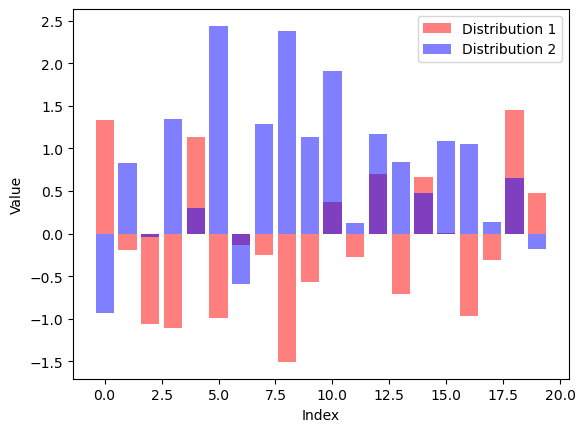

In [30]:
import matplotlib.pyplot as plt
import numpy as np

# Generate two random distributions
distribution1 = np.random.normal(loc=0, scale=1, size=20)
distribution2 = np.random.normal(loc=1, scale=1, size=20)

# Define the x-axis values as indices
x = np.arange(len(distribution1))

# Plot the values of the distributions using a bar plot
plt.bar(x, distribution1, color='red', alpha=0.5, label='Distribution 1')
plt.bar(x, distribution2, color='blue', alpha=0.5, label='Distribution 2')

# Add labels and legend
plt.xlabel('Index')
plt.ylabel('Value')
plt.legend(loc='upper right')

# Show the plot
plt.show()


In [ ]:
import matplotlib.pyplot as plt
d = 0.015

fig, (ax1,ax2) = plt.subplots(1,2,sharey=True)
ax1.set_xlim(97,105)
ax2.set_xlim(335.5,339)
ax2.hist(r_norm,color='lightsteelblue')
# plt.axes().set_aspect(1)
ax2.axvline(np.array(r_norm).mean(), color='r', linestyle='dashed', linewidth=1)
trans = ax2.get_xaxis_transform()
plt.text(np.array(r_norm).mean()+0.15, .8, 'AVG_random', transform=trans)
ax1.axvline(norm, color='r', linestyle='dashed', linewidth=1)
trans = ax1.get_xaxis_transform()
plt.text(norm+0.2, .8, 'AVG_BERT', transform=trans)

ax1.spines['right'].set_visible(False)
ax2.spines['left'].set_visible(False)
ax1.yaxis.tick_left()
ax2.yaxis.tick_right()
# plt.xticks(np.arange(90, 350, 130))
# plt.tight_layout()
plt.subplots_adjust(wspace=0.15)


kwargs = dict(transform=ax1.get_xaxis_transform(), color='k', clip_on=False)
ax1.plot((105-d,105+d),(1-d,1+d),**kwargs)
ax1.plot((105-d,105+d),(-d,d),**kwargs)
kwargs.update(transform=ax2.get_xaxis_transform())
ax1.plot((335.45-d,335.45+d),(1-d,1+d),**kwargs)
ax1.plot((335.45-d,335.45+d),(-d,d),**kwargs)
plt.savefig('avg_linear.png')
plt.show()

In [ ]:
#PCA on user embedding

In [51]:
cov_mat = np.cov(user_embedding.T)
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)

# print the Eigenvalues
print("Raw Eigenvalues: \n", eigen_vals)
# the sum of the Eigenvalues 
print("Percentage of Variance Explained by Each Component: \n", eigen_vals/sum(eigen_vals))

Raw Eigenvalues: 
 [2.78498928e+00 8.61219863e-01 4.53074386e-01 3.72533150e-01
 2.80058666e-01 2.23018928e-01 1.66875435e-01 1.32467524e-01
 1.25979724e-01 1.14223174e-01 9.67464619e-02 8.87011329e-02
 7.89307251e-02 7.46271882e-02 6.51683487e-02 6.23868105e-02
 5.84103078e-02 5.60934614e-02 5.02259147e-02 4.84220205e-02
 4.66855214e-02 8.12976508e-04 7.81988946e-04 1.29172480e-03
 1.55670439e-03 1.68137866e-03 2.79856346e-03 4.59472518e-03
 5.39507742e-03 4.36021588e-02 4.12170993e-02 8.60819938e-03
 9.36317052e-03 1.04984066e-02 3.80428468e-02 1.52221673e-02
 1.58433114e-02 1.72116683e-02 1.91114324e-02 3.61372651e-02
 3.46562990e-02 2.11179750e-02 3.28582840e-02 3.10637530e-02
 3.01746324e-02 2.84730438e-02 2.79469483e-02 2.59045119e-02
 2.32593726e-02 2.40794953e-02]
Percentage of Variance Explained by Each Component: 
 [4.09910301e-01 1.26759157e-01 6.66860224e-02 5.48315127e-02
 4.12206010e-02 3.28251732e-02 2.45616599e-02 1.94973112e-02
 1.85424004e-02 1.68120056e-02 1.42396854

In [6]:
tot = sum(eigen_vals)
var_exp = [(i / tot) for i in sorted(eigen_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
cum_var_exp

array([0.4099103 , 0.53666946, 0.60335548, 0.65818699, 0.69940759,
       0.73223277, 0.75679443, 0.77629174, 0.79483414, 0.81164614,
       0.82588583, 0.83894136, 0.85055882, 0.86154287, 0.87113471,
       0.88031715, 0.88891431, 0.89717046, 0.90456299, 0.91169001,
       0.91856145, 0.92497906, 0.93104562, 0.93664498, 0.94196387,
       0.94706477, 0.95190104, 0.95647318, 0.96091445, 0.96510527,
       0.96921866, 0.97303143, 0.97657558, 0.97999903, 0.98310729,
       0.98592022, 0.98845353, 0.99078543, 0.99302592, 0.99457113,
       0.99594926, 0.99721626, 0.99801034, 0.99868661, 0.99909852,
       0.999346  , 0.99957512, 0.99976524, 0.9998849 , 1.        ])

In [53]:
eigen_vecs.shape

(50, 50)

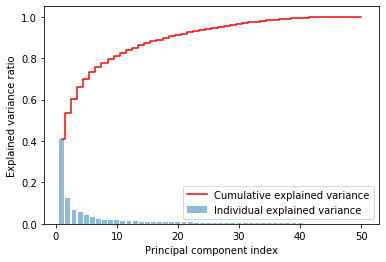

In [12]:
import matplotlib.pyplot as plt

plt.bar(range(1,51), var_exp, alpha=0.5, align='center',
        label='Individual explained variance')
plt.step(range(1,51), cum_var_exp, where='mid',
         label='Cumulative explained variance',
         color='red')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc="lower right")
plt.savefig('pca')
plt.show()

In [55]:
user_boolean_embedding.shape

(6040, 30)

In [9]:
_, index = np.unique(user_boolean_embedding, axis=0, return_index=True)

In [10]:
index

array([ 355, 2804, 1045,  177,    1,  759, 1121,   89,  947,  443,  724,
       1735,   30,  127, 2387, 1169,  965,   79, 5222,  153, 1061,  551,
        147,  306,  365,  269,  286,  366,  810,  325, 2404,  243,  432,
        295, 4877, 1144,  626,   16,  349, 2003,  106,   43,  160,  108,
        124,  215,  104,   39,  390,  549,    3, 1288, 2240, 4132,   32,
        826,   12,   55,  101,  326,   99,  156,  110,   73,  140,   64,
         13,  265,  122, 1558,   28,  319, 1041, 1284, 1007,  332,    6,
       4561,    4,  573,   65,    8,  111,    2,   19,    7,   52,   26,
       4687,   41,   14,  236,  235,   47,   35,   57,  148, 3112,  137,
         45,  256,  180,   20,   21,  196,   48,  188,  437,  125, 1786,
        391,  989,  185,   24,  142,  135,   63,  228,  736,  774, 1467,
       4412, 4477,  718, 4786, 1817, 4005, 3045, 4806, 1814,   18, 4186,
        886, 1037,  515,  163, 2405,  885, 3780,   88, 4986, 2333,  601,
        758,  333,  314, 1179, 4230,  170, 1110,  8

In [11]:
df = pd. DataFrame(user_boolean_embedding)